In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
plt.rc('font',family = 'NanumBarunGothic')

## GDP

In [4]:
gdp = pd.read_csv('/content/drive/MyDrive/AI_PROJECT1/GDP.csv')
gdp.drop(0, inplace=True)
gdp.rename(columns = {'Unnamed: 0':'날짜'}, inplace=True)
gdp = gdp.set_index('날짜')

In [5]:
YG = pd.read_csv('/content/drive/MyDrive/AI_PROJECT1/주가데이터/YG_ent.csv')

YG['날짜']=pd.to_datetime(YG['날짜'])
YG.sort_values(by='날짜',inplace=True)
YG = YG.set_index('날짜')
YG = YG.resample(rule='Y').mean()
YG = YG.iloc[:-1,0]

YG = YG.set_axis(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis='index')

YG = pd.DataFrame(YG)
YG_closing = YG["종가"].to_list()

In [6]:
JYP = pd.read_csv('/content/drive/MyDrive/AI_PROJECT1/주가데이터/JYP_ent.csv')

JYP['날짜']=pd.to_datetime(JYP['날짜'])
JYP.sort_values(by='날짜',inplace=True)
JYP = JYP.set_index('날짜')
JYP = JYP.resample(rule='Y').mean()
JYP = JYP.iloc[:-1,0]

JYP = JYP.set_axis(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis='index')
JYP = pd.DataFrame(JYP)
JYP_closing = JYP["종가"].to_list()

In [7]:
SM = pd.read_csv('/content/drive/MyDrive/AI_PROJECT1/주가데이터/SM_ent.csv')

SM['날짜']=pd.to_datetime(SM['날짜'])
SM.sort_values(by='날짜',inplace=True)
SM = SM.set_index('날짜')
SM = SM.resample(rule='Y').mean()
SM = SM.iloc[:-1,0]

SM = SM.set_axis(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis='index')
SM = pd.DataFrame(SM)
SM_closing = SM["종가"].to_list()

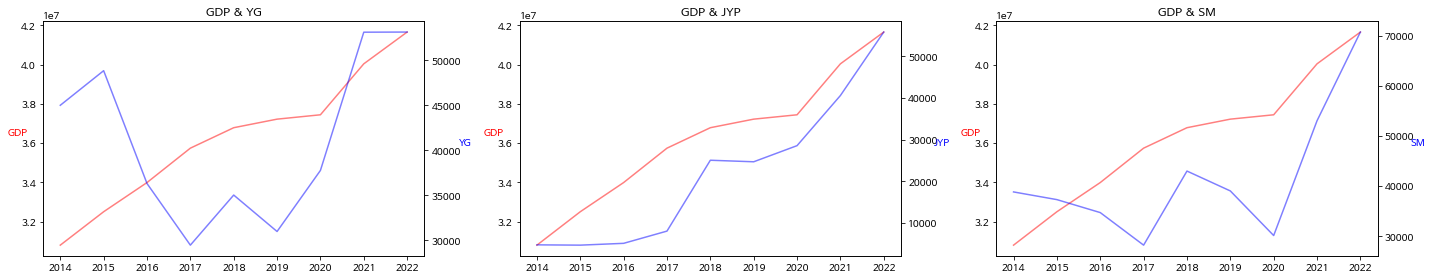

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax[0].plot(gdp.index, gdp["GDP"], color = 'red', alpha = 0.5)
ax[0].set_ylabel('GDP', color = 'red', rotation = 0)
ax[0].set_title('GDP & YG')
ax2 = ax[0].twinx()
ax2.plot(gdp.index, YG_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('YG', color = 'blue', rotation = 0)

ax[1].plot(gdp.index, gdp["GDP"], color = 'red', alpha = 0.5)
ax[1].set_ylabel('GDP', color = 'red', rotation = 0)
ax[1].set_title('GDP & JYP')
ax2 = ax[1].twinx()
ax2.plot(gdp.index, JYP_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('JYP', color = 'blue', rotation = 0)

ax[2].plot(gdp.index, gdp["GDP"], color = 'red', alpha = 0.5)
ax[2].set_ylabel('GDP', color = 'red', rotation = 0)
ax[2].set_title('GDP & SM')
ax2 = ax[2].twinx()
ax2.plot(gdp.index, SM_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('SM', color = 'blue', rotation = 0)

plt.tight_layout()
plt.show()

## 환율

In [9]:
er = pd.read_csv('/content/drive/MyDrive/AI_PROJECT1/환율.csv')

In [10]:
er['날짜']=pd.to_datetime(er['Unnamed: 0'])
er.sort_values(by='날짜',inplace=True)
er = er.set_index('날짜')
er = er.resample(rule='Y').mean()
er = er.iloc[1:-1,:]

er = er.set_axis(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis='index')

er = pd.DataFrame(er)

In [11]:
er

,종가,오픈,고가,저가,변동 %
2014,1053.315326,1053.016590,1056.026743,1050.571992,0.016169
2015,1132.071226,1131.747739,1137.361533,1127.045900,0.029617
2016,1160.540958,1160.473218,1166.894981,1155.013027,0.011839
2017,1130.473654,1130.994269,1135.325154,1126.428538,-0.046000
2018,1100.501341,1100.276820,1105.102529,1096.161533,0.017739
2019,1164.920690,1165.407510,1169.489808,1161.831877,0.014215
2020,1178.802710,1179.488779,1184.543282,1174.543473,-0.022061
2021,1144.663678,1144.707739,1149.339847,1140.843257,0.035785
2022,1291.500308,1291.864192,1298.417885,1285.924577,0.025115


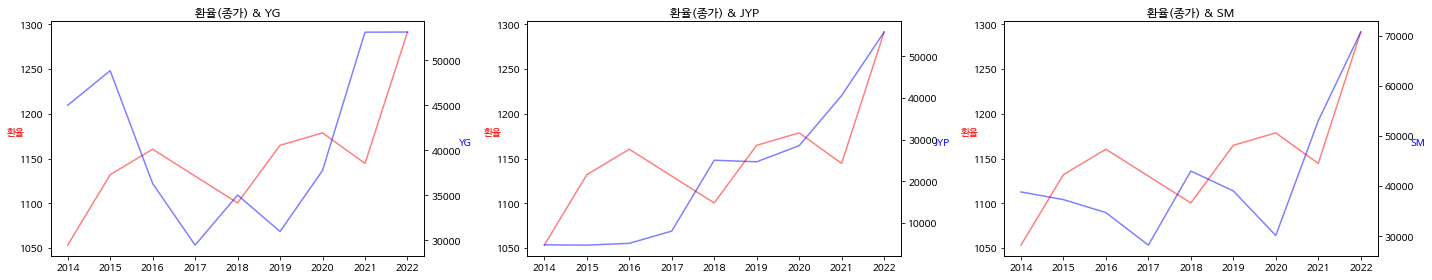

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax[0].plot(er.index, er["종가"], color = 'red', alpha = 0.5)
ax[0].set_ylabel('환율', color = 'red', rotation = 0)
ax[0].set_title('환율(종가) & YG')
ax2 = ax[0].twinx()
ax2.plot(er.index, YG_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('YG', color = 'blue', rotation = 0)

ax[1].plot(er.index, er["종가"], color = 'red', alpha = 0.5)
ax[1].set_ylabel('환율', color = 'red', rotation = 0)
ax[1].set_title('환율(종가) & JYP')
ax2 = ax[1].twinx()
ax2.plot(er.index, JYP_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('JYP', color = 'blue', rotation = 0)

ax[2].plot(er.index, er["종가"], color = 'red', alpha = 0.5)
ax[2].set_ylabel('환율', color = 'red', rotation = 0)
ax[2].set_title('환율(종가) & SM')
ax2 = ax[2].twinx()
ax2.plot(er.index, SM_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('SM', color = 'blue', rotation = 0)

plt.tight_layout()
plt.show()

<ipython-input-13-cbaa904a4283>:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


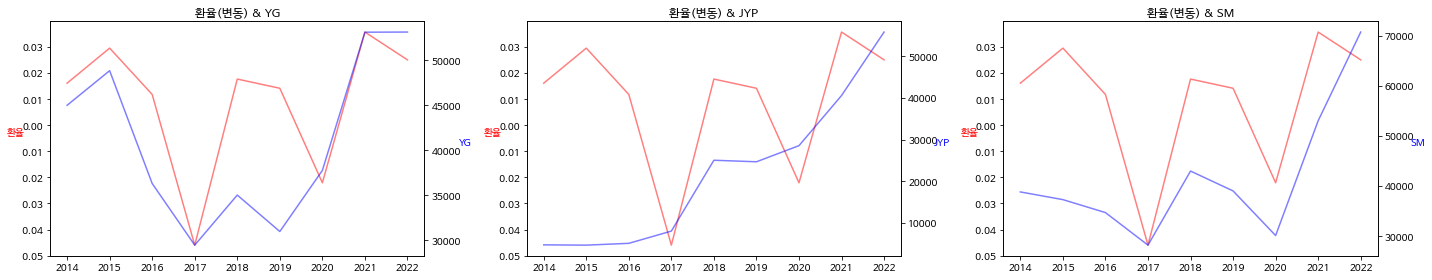

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax[0].plot(er.index, er["변동 %"], color = 'red', alpha = 0.5)
ax[0].set_ylabel('환율', color = 'red', rotation = 0)
ax[0].set_title('환율(변동) & YG')
ax2 = ax[0].twinx()
ax2.plot(er.index, YG_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('YG', color = 'blue', rotation = 0)

ax[1].plot(er.index, er["변동 %"], color = 'red', alpha = 0.5)
ax[1].set_ylabel('환율', color = 'red', rotation = 0)
ax[1].set_title('환율(변동) & JYP')
ax2 = ax[1].twinx()
ax2.plot(er.index, JYP_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('JYP', color = 'blue', rotation = 0)

ax[2].plot(er.index, er["변동 %"], color = 'red', alpha = 0.5)
ax[2].set_ylabel('환율', color = 'red', rotation = 0)
ax[2].set_title('환율(변동) & SM')
ax2 = ax[2].twinx()
ax2.plot(er.index, SM_closing, color = 'blue', alpha = 0.5)
ax2.set_ylabel('SM', color = 'blue', rotation = 0)

plt.tight_layout()
plt.show()